# Proyecto 1 – Relación Minutos Ingreso

Integrantes del grupo:
- OSCAR EDUARDO AVILA BERNAL
- OSCAR IVAN BAUTISTA SANTANA
- JORGE ALEJANDRO HURTADO RAMIREZ
- JOSE DARIO NAVAS TORRES
- JUAN DAVID ORTEGA MURCIA
- NICOLAS ESTEBAN ROMERO VARGAS

Descripción del problema:

El objetivo es determinar si hay una relación entre los ingresos totales de los clientes y la cantidad de minutos que utilizan con la compañía de telecomunicaciones, utilizando datos del conjunto de registros Credito_dias.csv. Este conjunto de datos incluye variables como ingresos del cliente (totrev), total de minutos utilizados (totmou), indicador de tarjeta de crédito (creditcd), y número de días de antigüedad del equipo actual (eqpdays). ¿Los clientes con ingresos más altos tienden a usar más minutos, o viceversa? Esto permitirá a la empresa entender mejor el comportamiento de sus clientes y tomar decisiones estratégicas.

In [27]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np 

- Se carga la abse datos 2winequality-red.csv" y se guarda como un DataSet de Pandas. Luego se realiza un primer vistazo a los datos y su información

In [28]:
df = pd.read_csv('Credito_dias.csv')
df.head()

,totmou,totrev,creditcd,eqpdays,Customer_ID
0,7269.0,906.58,Y,371,1082423
1,13552.0,1172.25,N,83,1069232
2,4152.0,577.39,Y,675,1031705
3,1863.0,294.26,Y,218,1089806
4,4155.0,433.16,N,222,1076695


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   totmou       10000 non-null  float64
 1   totrev       10000 non-null  float64
 2   creditcd     9848 non-null   object 
 3   eqpdays      10000 non-null  int64  
 4   Customer_ID  10000 non-null  int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 390.8+ KB


-  Se Filtran valores únicos y se eliminan filas con valores nulos en 'creditcd'

In [30]:
df['creditcd'].unique()
df.dropna(subset=['creditcd'], inplace=True)
df[df['creditcd'].isnull()]

,totmou,totrev,creditcd,eqpdays,Customer_ID


- Se convierte la columna 'totmou' a tipo entero y se muestra la información estadística

In [31]:
df['totmou'] = df['totmou'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9848 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   totmou       9848 non-null   int32  
 1   totrev       9848 non-null   float64
 2   creditcd     9848 non-null   object 
 3   eqpdays      9848 non-null   int64  
 4   Customer_ID  9848 non-null   int64  
dtypes: float64(1), int32(1), int64(2), object(1)
memory usage: 423.2+ KB


- Exploratorio separado por cada una de las variables que se tienen en esta base. Histogramas para las variables numéricas y diagramas de barras para las categóricas.

In [32]:
df.describe()

,totmou,totrev,eqpdays,Customer_ID
count,9848.000000,9848.000000,9848.000000,9.848000e+03
mean,7697.898964,1042.302115,386.982433,1.049854e+06
std,8662.005853,857.945971,252.473800,2.875331e+04
min,0.000000,11.100000,-5.000000,1.000014e+06
25%,2575.000000,526.627500,210.000000,1.024992e+06
50%,5261.500000,820.955000,338.000000,1.049404e+06
75%,9842.000000,1272.975000,523.000000,1.074646e+06
max,163264.000000,13426.600000,1823.000000,1.099992e+06


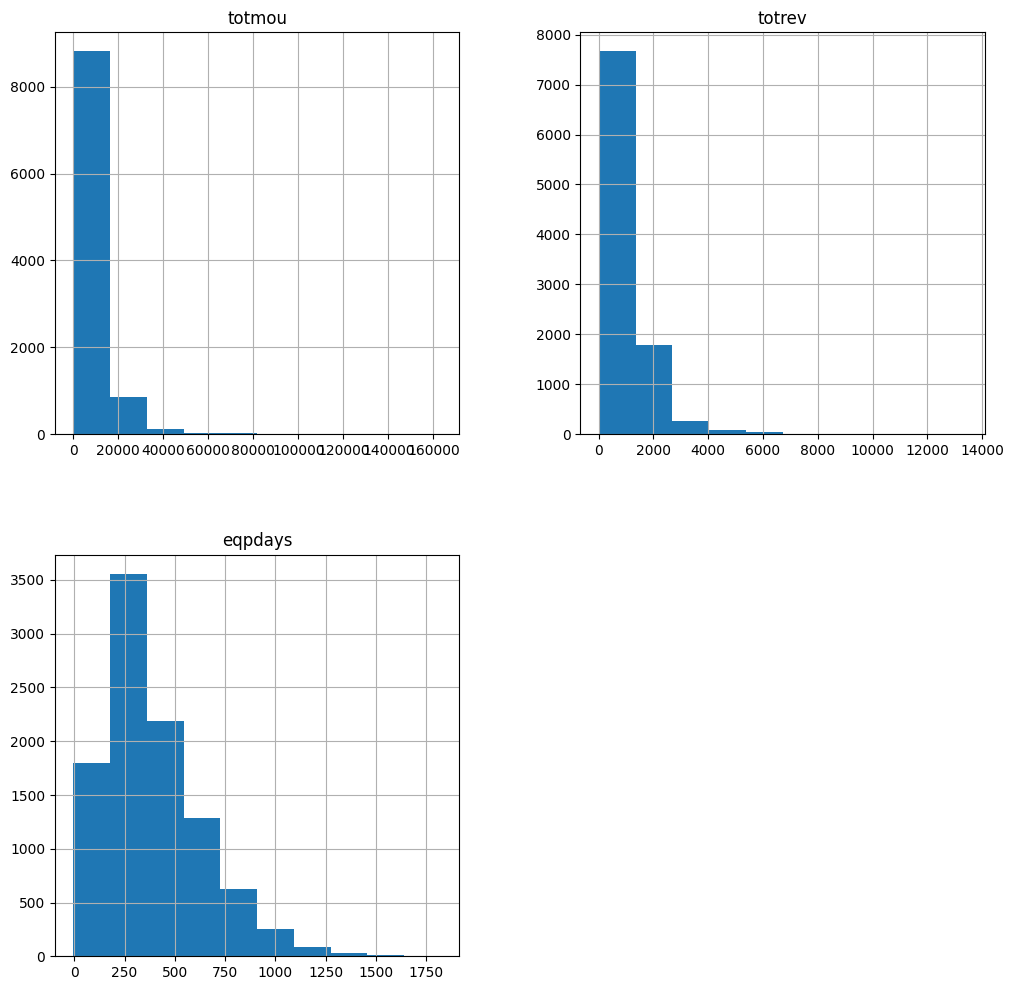

In [33]:
df.drop(["creditcd","Customer_ID"], axis=1).hist(figsize=(12, 12))
plt.show()

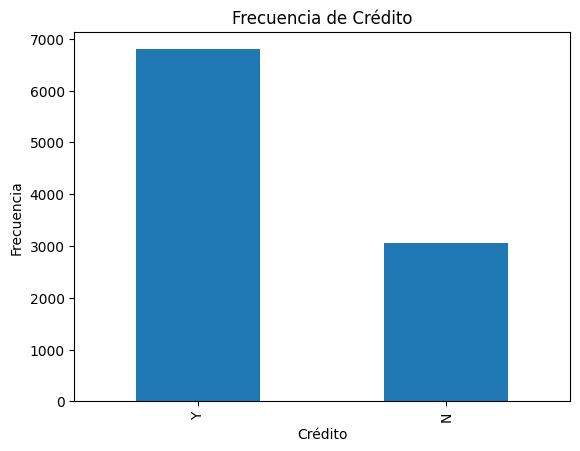

In [34]:
df['creditcd'].value_counts().plot(kind='bar')
plt.xlabel('Crédito')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Crédito')
plt.show()

De las estadisticas descriptivas se evidencia que cada cliente en promedio utiliza 7697 minutos, pero la desviación estandar es considerablemente alta, por lo que realizar un posterior análisis sobre esta variable es importante. En terminos de los ingresos por cliente la desviación también es alta por lo que seguramente los datos están muy dispersos y se requiere realizar diagramas de cajas en estas dos variables para eliminar los outliers. En terminos de la antiguedad del equipo actual, salta a la vista que el valor minimo es negativo, lo cual no suena razonable, por lo que se requiere limpiar los valores negativos de esra variable. 

# Hacer Boxplots para variables numericas 

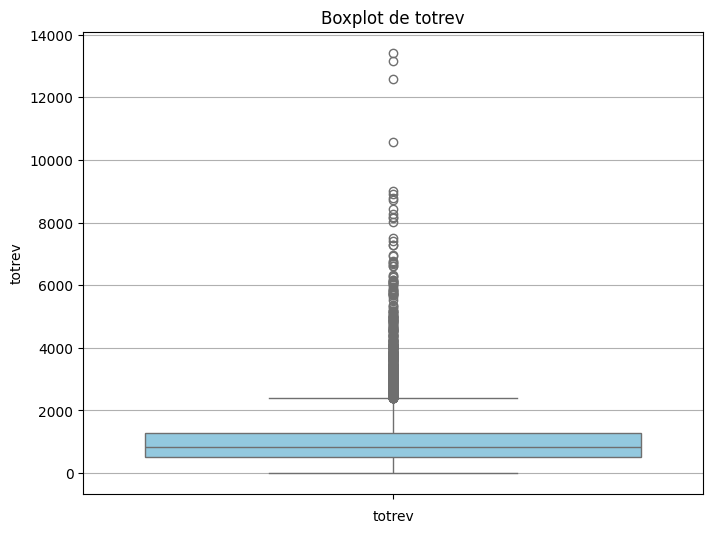

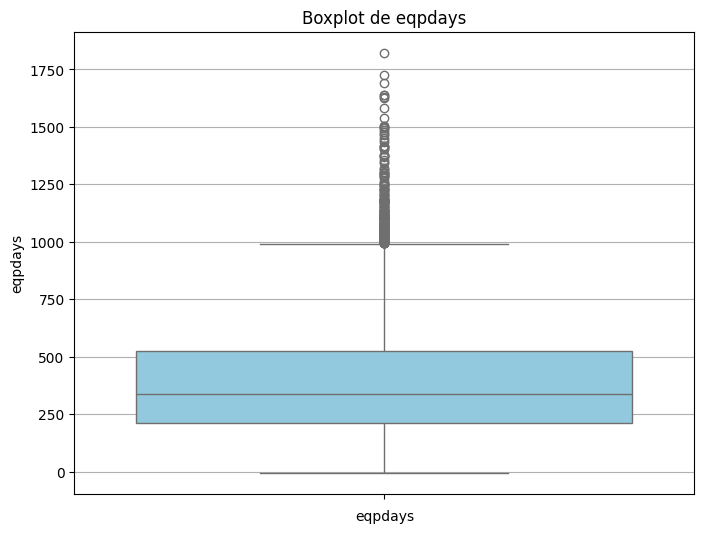

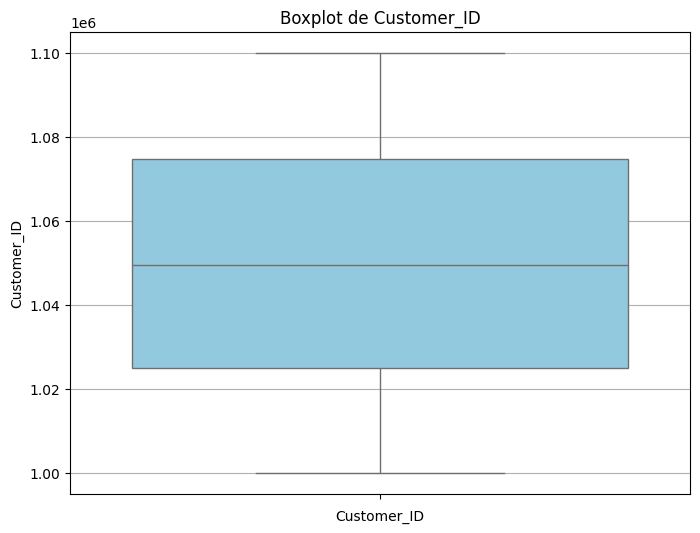

In [35]:
numeric_vars = df.select_dtypes(include=['int64', 'float64']).columns
for var in numeric_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[var], color='skyblue')
    plt.title(f'Boxplot de {var}')
    plt.xlabel(var)
    plt.grid(axis='y')
    plt.show()


Con los Boxplots hechos, es más facíl evidenciar visualmente la presencia de outliers y eliminarlos si aplican

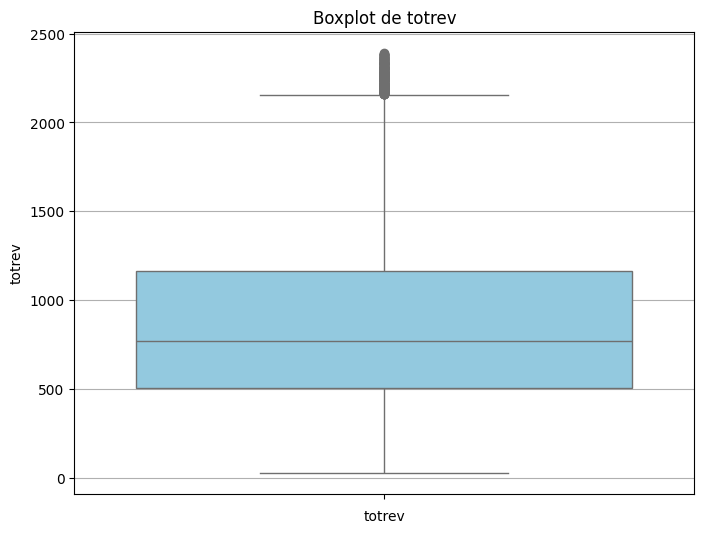

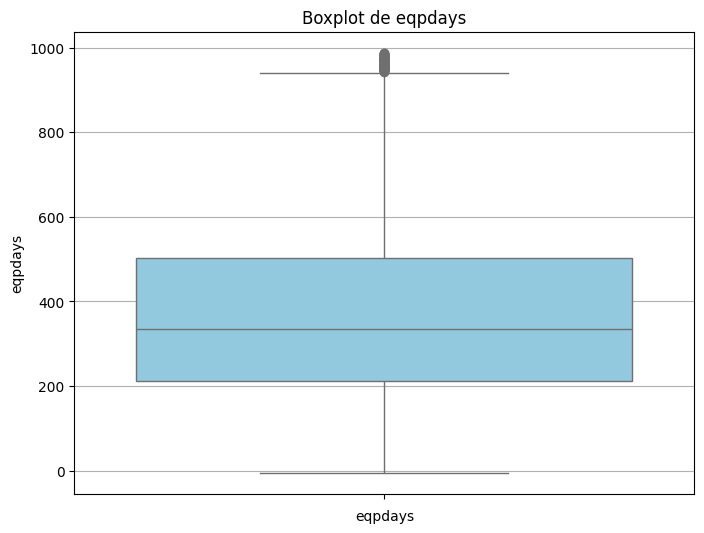

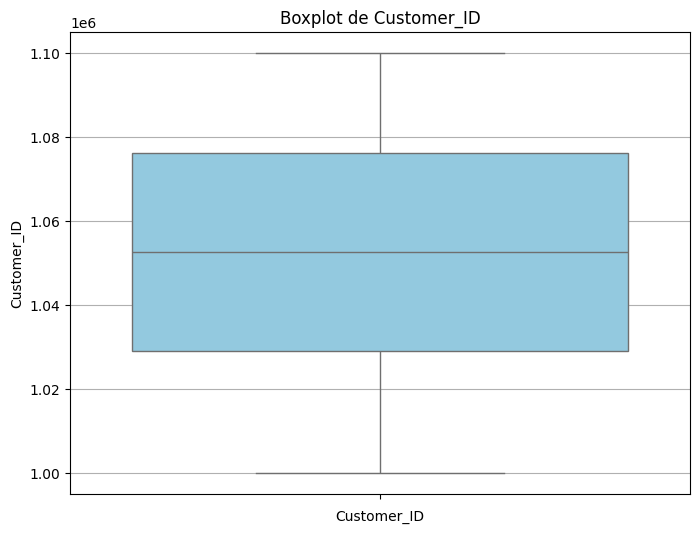

,totmou,totrev,creditcd,eqpdays,Customer_ID
count,9073.000000,9073.000000,9073,9073.000000,9.073000e+03
unique,NaN,NaN,2,NaN,NaN
top,NaN,NaN,Y,NaN,NaN
freq,NaN,NaN,6218,NaN,NaN
mean,6445.639590,883.620792,NaN,369.085969,1.052429e+06
std,5440.868024,490.942303,NaN,220.008612,2.741268e+04
min,0.000000,30.000000,NaN,-5.000000,1.000014e+06
25%,2478.000000,506.730000,NaN,211.000000,1.029033e+06
50%,4951.000000,772.670000,NaN,334.000000,1.052594e+06
75%,8921.000000,1166.090000,NaN,503.000000,1.076144e+06


In [36]:
# Eliminar outliers basados en el rango intercuartil (IQR)
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df_cleaned

# Eliminar outliers 
numeric_vars = df.select_dtypes(include=['int64', 'float64']).columns
for var in numeric_vars:
    df = remove_outliers(df, var)

# Boxplots
for var in numeric_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[var], color='skyblue')
    plt.title(f'Boxplot de {var}')
    plt.xlabel(var)
    plt.grid(axis='y')
    plt.show()

df.describe(include=['object','number'])


Despues de remover los outliers, la base queda reducida a 8365 datos, pero siguen saliendo valores negativos para la variable de antiguedad, se realiza el filtro, con esta última transformación la base queda limpia para sacar conclusiones

In [37]:
# Eliminar valores negativos de eqpdays
variable = 'eqpdays'  
df = df.loc[df[variable] >= 0]

df.describe()


,totmou,totrev,eqpdays,Customer_ID
count,9058.000000,9058.000000,9058.000000,9.058000e+03
mean,6431.728417,882.849532,369.701811,1.052438e+06
std,5419.988413,490.590432,219.669123,2.741032e+04
min,0.000000,30.000000,0.000000,1.000014e+06
25%,2472.250000,506.255000,211.000000,1.029032e+06
50%,4944.000000,772.015000,334.000000,1.052615e+06
75%,8912.750000,1164.027500,503.000000,1.076144e+06
max,54678.000000,2392.280000,988.000000,1.099992e+06


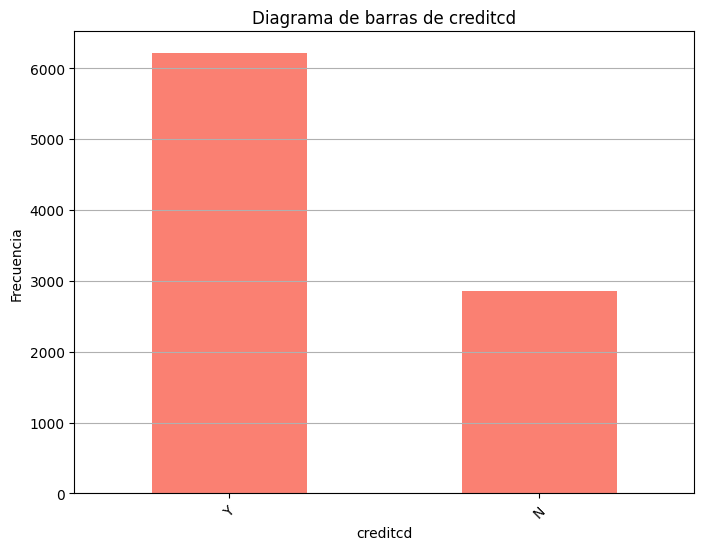

In [38]:
categorical_vars = df.select_dtypes(include=['object']).columns
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    df[var].value_counts().plot(kind='bar', color='salmon')
    plt.title(f'Diagrama de barras de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()


EL diagrama de barras de la variable categorica de tarjeta de crédito nos indica que la mayoria de clientes tienen tarjeta de crédito. De los histogramas se puede inferir que, las variables análizadas son asimetricas 

### Diagrama de dispersión entre las variables totrev y totmou. 

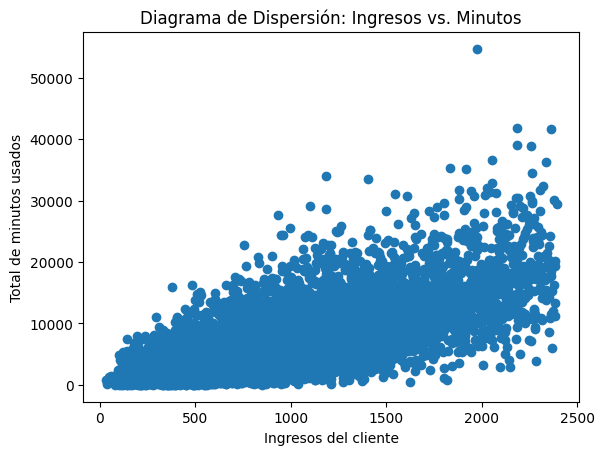

In [39]:
plt.scatter(df['totrev'], df['totmou'])
plt.xlabel('Ingresos del cliente')
plt.ylabel('Total de minutos usados')
plt.title('Diagrama de Dispersión: Ingresos vs. Minutos')
plt.show()

# Conclusiones_1
Basándonos en el gráfico de dispersión, parece que existe una correlación positiva entre los minutos usados y los ingresos de cada cliente. Sin embargo, para obtener conclusiones más precisas y cuantificar esta relación, es necesario implementar modelos de regresión lineal u otros métodos estadísticos que nos permitan analizar la asociación entre estas variables de manera más rigurosa.

### ¿Existe relación alguna entre el total de minutos usados con la compañía y el ingreso total de los clientes?


Unicamente utilizando el grafico de dispersión visualmente se presenta una relación positiva entre mayor numero de minutos usados e ingresos del ciente, lo que nos permitiría inferir que entre mayor sean los ingresos del cliente es más porbable que los minutos usados del mismo sena también altos. La mayoría de los clientes con los salarios más altos tienen un uso más alto que aquellos clientes con ingresos más bajos, de igual forma la mayoría de los clientes con ingresos bajos tienden a tener nivelos de uso más bajos. 


### ¿El hecho de tener crédito afecta alguna de estas dos variables?, Diagrama de dispersión una leyenda que indique si tiene crédito o no.

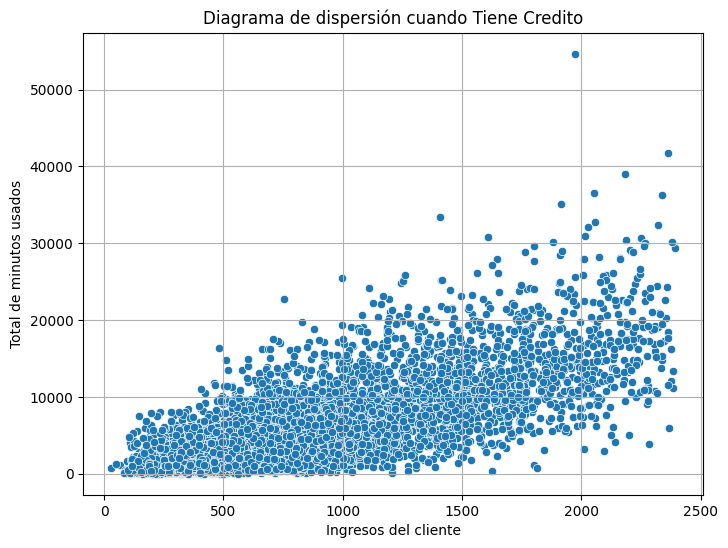

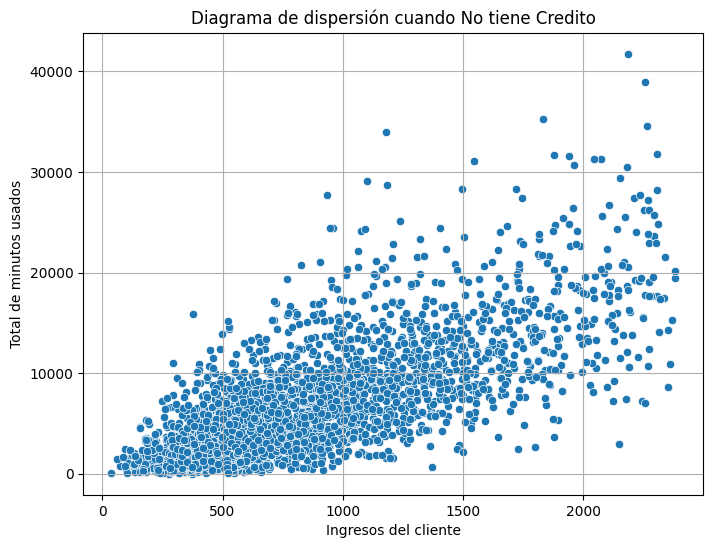

In [40]:
variable_numerica_1 = 'totrev'
variable_numerica_2 = 'totmou'
variable_categorica = 'creditcd'

valores_categoricos = df[variable_categorica].unique()

for valor in valores_categoricos:
    if valor=="Y":
        valor_l="Tiene Credito"
    else:
        valor_l="No tiene Credito"
    plt.figure(figsize=(8, 6))
    plt.title(f'Diagrama de dispersión cuando {valor_l}')
    sns.scatterplot(x=variable_numerica_1, y=variable_numerica_2, data=df[df[variable_categorica] == valor])
    plt.xlabel('Ingresos del cliente')
    plt.ylabel('Total de minutos usados')
    plt.grid(True)
    plt.show()


# Conclusiones_2

La presencia de tarjeta de crédito parece influir en la relación entre las variables analizadas. Para comprobarlo, se generó un diagrama de dispersión que diferencia a los clientes según si tienen o no tarjeta de crédito. En este diagrama, los puntos se destacan mediante colores y una leyenda que indica cada grupo. Se observa que la relación positiva entre ingresos y minutos usados es más evidente en los clientes sin tarjeta de crédito. Aunque en la mayoría de los clientes con tarjeta de crédito esta relación persiste, para aquellos con ingresos menores a 1000, esta asociación no es tan clara, ya que muestran una dispersión mayor en los minutos usados.